In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from pandas.tools.plotting import autocorrelation_plot
plt.style.use('fivethirtyeight')

In [2]:
sg_df = pd.read_csv('D:/data/quicken_loans_sg.csv')
sg_df.rename(columns = {'shot_dist_x': 'shot_dist', 'shot_dist_y': 'hole_dist_yds'}, inplace = True)


player_ls = sg_df['player_name'].unique()

grouped_df = sg_df[['player_id', 'player_name', 'date_started', 'tournament_id', 'course_num', 'hole_num',
                    'hole_id','round_num', 'stroke_gained', 'par','hole_dist_yds']].groupby(['player_id', 
                    'player_name','date_started', 'hole_id', 'tournament_id', 'course_num', 'round_num', 
                    'hole_num', 'par', 'hole_dist_yds']).sum()

grouped_df.reset_index(inplace = True)

grouped_df

,player_id,player_name,date_started,hole_id,tournament_id,course_num,round_num,hole_num,par,hole_dist_yds,stroke_gained
0,19846.0,Brian Gay,01_12_2017,2017_006_6_1_1,6.0,6.0,1.0,1.0,4.0,480.000000,0.28
1,19846.0,Brian Gay,01_12_2017,2017_006_6_1_10,6.0,6.0,1.0,10.0,4.0,351.000000,-0.08
2,19846.0,Brian Gay,01_12_2017,2017_006_6_1_11,6.0,6.0,1.0,11.0,3.0,194.000000,0.12
3,19846.0,Brian Gay,01_12_2017,2017_006_6_1_12,6.0,6.0,1.0,12.0,4.0,440.000000,0.08
4,19846.0,Brian Gay,01_12_2017,2017_006_6_1_13,6.0,6.0,1.0,13.0,4.0,477.000000,0.28
5,19846.0,Brian Gay,01_12_2017,2017_006_6_1_14,6.0,6.0,1.0,14.0,4.0,430.000000,0.08
6,19846.0,Brian Gay,01_12_2017,2017_006_6_1_15,6.0,6.0,1.0,15.0,4.0,398.000000,-0.01
7,19846.0,Brian Gay,01_12_2017,2017_006_6_1_16,6.0,6.0,1.0,16.0,4.0,417.000000,0.02
8,19846.0,Brian Gay,01_12_2017,2017_006_6_1_17,6.0,6.0,1.0,17.0,3.0,194.000000,0.12
9,19846.0,Brian Gay,01_12_2017,2017_006_6_1_18,6.0,6.0,1.0,18.0,5.0,551.000000,-0.26


In [16]:
now = datetime.now()

def create_datetime(x):
    date = datetime.strptime(x, '%m_%d_%Y')
    return date

def days_elapsed(date):
    return (now - date).days

def create_df(player):
    df = grouped_df[grouped_df['player_name'] == player]
    
    df.sort_values(['date_started', 'round_num', 'hole_num'], inplace = True)
    df.reset_index(inplace = True, drop = True)
    
    df['cum_sum'] = df['stroke_gained'].cumsum()
    
    return df


#grouped_df['date_started'] = grouped_df['date_started'].apply(lambda x: create_datetime(x))
#grouped_df['days_elapsed'] = grouped_df['date_started'].apply(lambda x: days_elapsed(x))


df = create_df(player_ls[28])
df

C:\Users\vales\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\vales\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,player_id,player_name,date_started,hole_id,tournament_id,course_num,round_num,hole_num,par,hole_dist_yds,stroke_gained,cum_sum
0,33418.0,Shawn Stefani,01_12_2017,2017_006_6_1_1,6.0,6.0,1.0,1.0,4.0,480.0,0.28,0.280
1,33418.0,Shawn Stefani,01_12_2017,2017_006_6_1_2,6.0,6.0,1.0,2.0,4.0,423.0,1.02,1.300
2,33418.0,Shawn Stefani,01_12_2017,2017_006_6_1_3,6.0,6.0,1.0,3.0,4.0,422.0,0.02,1.320
3,33418.0,Shawn Stefani,01_12_2017,2017_006_6_1_4,6.0,6.0,1.0,4.0,3.0,204.0,1.12,2.440
4,33418.0,Shawn Stefani,01_12_2017,2017_006_6_1_5,6.0,6.0,1.0,5.0,4.0,467.0,0.17,2.610
5,33418.0,Shawn Stefani,01_12_2017,2017_006_6_1_6,6.0,6.0,1.0,6.0,4.0,460.0,0.17,2.780
6,33418.0,Shawn Stefani,01_12_2017,2017_006_6_1_7,6.0,6.0,1.0,7.0,3.0,176.0,0.05,2.830
7,33418.0,Shawn Stefani,01_12_2017,2017_006_6_1_8,6.0,6.0,1.0,8.0,4.0,454.0,0.17,3.000
8,33418.0,Shawn Stefani,01_12_2017,2017_006_6_1_9,6.0,6.0,1.0,9.0,5.0,506.0,0.41,3.410
9,33418.0,Shawn Stefani,01_12_2017,2017_006_6_1_10,6.0,6.0,1.0,10.0,4.0,351.0,0.92,4.330


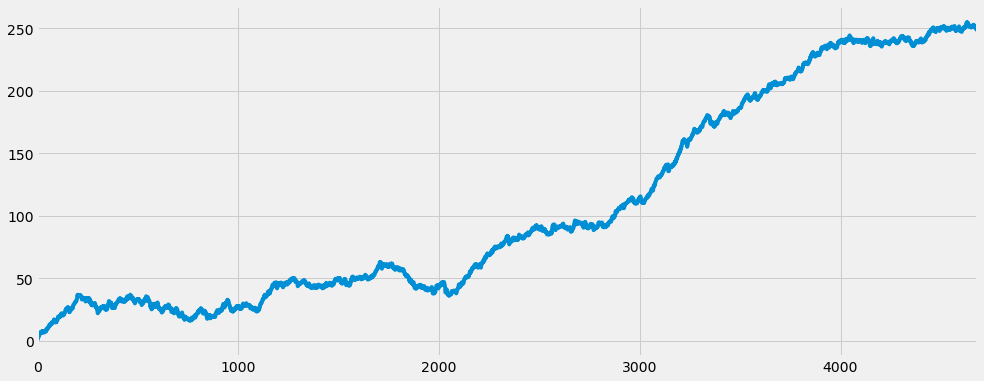

In [17]:
y = df[['cum_sum']]
#y.set_index('date_started', inplace = True)
y['cum_sum'].plot(figsize = (15,6))
plt.show()

In [27]:
# Use grid search to generate and test ARIMA parameters

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(1, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (1, 1, 2) x (1, 1, 2, 12)
SARIMAX: (1, 1, 2) x (1, 2, 1, 12)
SARIMAX: (1, 2, 1) x (1, 2, 2, 12)
SARIMAX: (1, 2, 1) x (2, 1, 1, 12)


In [28]:
warnings.filterwarnings('ignore')

for param in pdq:
    for param_seasonal in seasonal_pdq:
        #try:
        mod = sm.tsa.statespace.SARIMAX(y,
                order = param, seasonal_order = param_seasonal,
                enforce_stationarity = False, enforce_invertibility = False)

        results = mod.fit()

        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        #except:
            #continue
            

ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:8040.150731061283
ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:8009.365593961222
ARIMA(1, 1, 1)x(1, 2, 1, 12)12 - AIC:9597.768572931105
ARIMA(1, 1, 1)x(1, 2, 2, 12)12 - AIC:8163.564514530417
ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:8024.916202695445
ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:8011.361464987782
ARIMA(1, 1, 1)x(2, 2, 1, 12)12 - AIC:9067.337740256811
ARIMA(1, 1, 1)x(2, 2, 2, 12)12 - AIC:8188.344614939686
ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:8037.194450769595
ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:8004.353733643698
ARIMA(1, 1, 2)x(1, 2, 1, 12)12 - AIC:9590.671544845998
ARIMA(1, 1, 2)x(1, 2, 2, 12)12 - AIC:8158.9853654033095
ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:8023.371574372817
ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:8006.351068371227
ARIMA(1, 1, 2)x(2, 2, 1, 12)12 - AIC:9064.684265968484
ARIMA(1, 1, 2)x(2, 2, 2, 12)12 - AIC:8161.054718987922
ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:8059.011245914038
ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:8023.960738770956
ARIMA(1, 

KeyboardInterrupt: 

In [29]:
model = sm.tsa.statespace.SARIMAX(y,
            order = (2,1,2), seasonal_order = (1,1,2,12), enforce_stationarity = False,
                                  enforce_invertibility = False)
results = model.fit()

In [30]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0385      0.161      6.444      0.000       0.723       1.354
ar.L2         -0.6066      0.153     -3.961      0.000      -0.907      -0.306
ma.L1         -1.0441      0.154     -6.760      0.000      -1.347      -0.741
ma.L2          0.6487      0.146      4.458      0.000       0.363       0.934
ar.S.L12      -0.9075      0.026    -34.472      0.000      -0.959      -0.856
ma.S.L12      -0.0665      0.129     -0.516      0.606      -0.319       0.186
ma.S.L24      -0.9331      0.120     -7.765      0.000      -1.169      -0.698
sigma2         0.4295      0.054      7.943      0.000       0.323       0.535


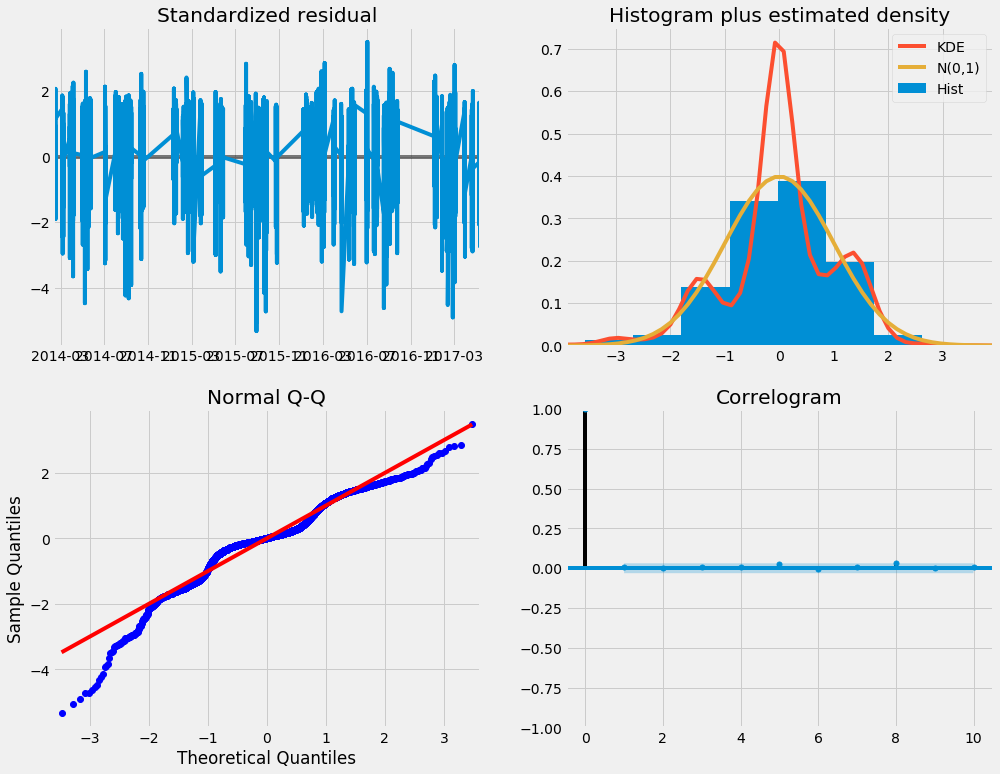

In [31]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [41]:
pred = results.get_prediction(start=pd.to_datetime('2017-04-23'), dynamic=False)
pred_ci = pred.conf_int()

TypeError: unorderable types: slice() > int()

In [18]:
now = datetime.now()
date_start = now - timedelta(days = len(y) - 1)

y['date'] = pd.date_range(date_start, periods = len(y), freq = 'D').normalize()
y

C:\Users\vales\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,cum_sum,date
0,0.280,2004-09-13
1,1.300,2004-09-14
2,1.320,2004-09-15
3,2.440,2004-09-16
4,2.610,2004-09-17
5,2.780,2004-09-18
6,2.830,2004-09-19
7,3.000,2004-09-20
8,3.410,2004-09-21
9,4.330,2004-09-22


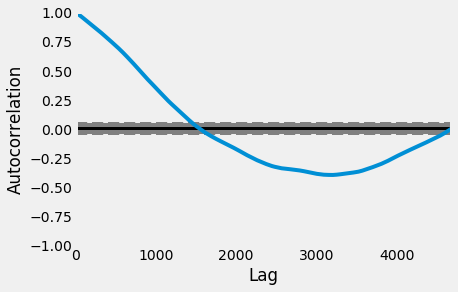

In [19]:
autocorrelation_plot(y['cum_sum'])
plt.show()

In [8]:
from statsmodels.tsa.arima_model import ARIMA
y.set_index('date', inplace = True)
model = ARIMA(y['cum_sum'], order = (12,1,10))
model_fit = model.fit(disp = 0)
print(model_fit.summary())

C:\Users\vales\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\vales\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.cum_sum   No. Observations:                 4193
Model:               ARIMA(12, 1, 10)   Log Likelihood               -4085.827
Method:                       css-mle   S.D. of innovations              0.641
Date:                Thu, 06 Jul 2017   AIC                           8219.653
Time:                        10:39:27   BIC                           8371.841
Sample:                    01-13-2006   HQIC                          8273.471
                         - 07-06-2017                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0374      0.015      2.543      0.011       0.009       0.066
ar.L1.D.cum_sum     -0.0779        nan        nan        nan         nan         nan
ar.L2.D.cum_sum      0.1038 

C:\Users\vales\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\vales\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\vales\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\vales\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


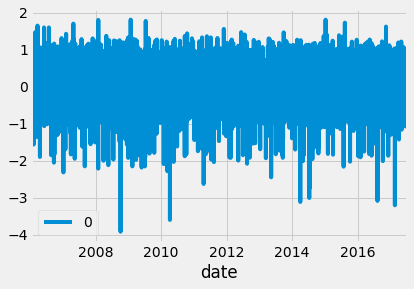

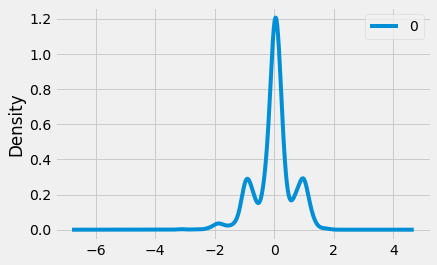

                 0
count  4193.000000
mean     -0.000743
std       0.641220
min      -3.922182
25%      -0.220278
50%       0.035025
75%       0.246842
max       1.812263


In [9]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

residuals.plot(kind = 'kde')
plt.show()
print(residuals.describe())

In [22]:
from sklearn.metrics import mean_squared_error as mse

X = y['cum_sum'].values
size = int(len(X) * .66)

train, test = X[0:size], X[size:len(X)]

history = [x for x in train]
predictions = list()

for t in range(72):
    model = ARIMA(history, order = (5,1,2))
    model_fit = model.fit(disp = 0)
    output = model_fit.forecast()
    yhat = output[0]
    
    predictions.append(yhat)
    
    obs = test[t]
    
    history.append(yhat)
    
    print('predicted = {}, expected = {}'.format(yhat, obs))
    
error = mse(test[0:72], predictions)
print('Test mse: {}'.format(error))

plt.plot(test[0:72])
plt.plot(predictions, color = 'red')
plt.show()

predicted = [ 129.77946537], expected = 130.13199999999924


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

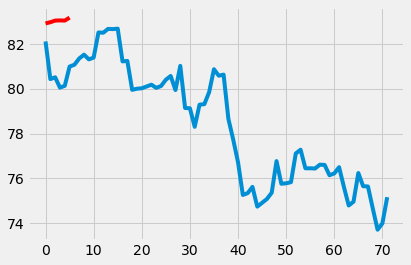

In [12]:
plt.plot(test[0:72])
plt.plot(predictions, color = 'red')
plt.show()

In [11]:
output

(array([ 83.17374113]),
 array([ 0.63679674]),
 array([[ 81.92564246,  84.42183981]]))